In [1]:
%pylab qt5

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime
import time
import pickle

In [3]:
from drivers.Agilent_PNA_L import Agilent_PNA_L

In [4]:
vna = Agilent_PNA_L("PNA-L1")

## Запись пропускания в зависимости от времени

In [15]:
znb.set_power(0)

In [19]:
tracedata_from_time = []
while True:
    tracedata_from_time.append((datetime.datetime.now(), (znb.get_frequencies(), znb.get_sdata())))
    print("\rLast time recorded:", datetime.datetime.now(), flush=True, end="")
    for i in range(0, 60):
        time.sleep(1)

Last time recorded: 2016-04-29 12:04:35.227484

C:\Anaconda\lib\site-packages\pyvisa\ctwrapper\functions.py:1569: VisaIOWarning: VI_SUCCESS_MAX_CNT (1073676294): The number of bytes transferred is equal to the requested input count. More data may be available.
  ret = library.viRead(session, buffer, count, byref(return_count))


KeyboardInterrupt: 

In [21]:
with open("./Data/transmission_on_temperature.pkl", "wb") as f:
    pickle.dump(tracedata_from_time, f)

In [25]:
array(tracedata_from_time)[:,0]

array([datetime.datetime(2016, 4, 28, 0, 53, 30, 50688),
       datetime.datetime(2016, 4, 28, 0, 54, 30, 147056),
       datetime.datetime(2016, 4, 28, 0, 55, 30, 245490), ...,
       datetime.datetime(2016, 4, 29, 12, 2, 34, 965752),
       datetime.datetime(2016, 4, 29, 12, 3, 35, 65711),
       datetime.datetime(2016, 4, 29, 12, 4, 35, 165074)], dtype=object)

In [42]:
S12s = array([tracedata[1] for tracedata in array(tracedata_from_time)[:,1]])

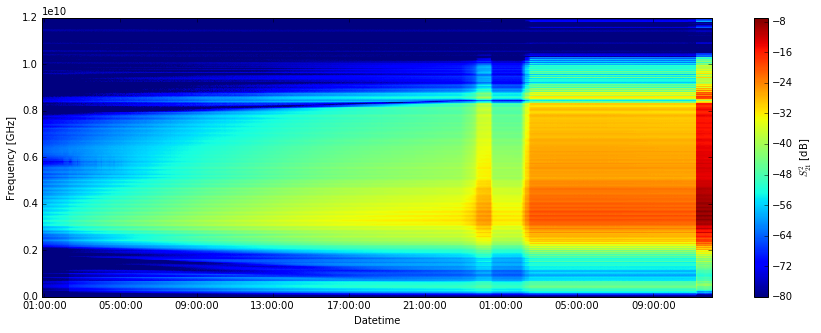

In [50]:
plt.pcolormesh(array(tracedata_from_time)[:,0], array(tracedata_from_time)[0][1][0], 20*log10(abs(S12s.T)), vmin=-80)
plt.gcf().set_size_inches(15,5)
plt.ylabel("Frequency [GHz]")
plt.xlabel("Datetime")
cb = plt.colorbar()
cb.set_label("$S^2_{21}$ [dB]")

In [53]:
str(datetime.datetime.now().date())

'2016-04-29'

## Power scan

In [1]:
from drivers.znb import Znb
from drivers.k6220 import K6220

In [ ]:
znb.set_

In [37]:
cs = K6220("GPIB0::12::INSTR")
# znb = Znb("ZNB")

Instrument initialized.
VISA resource: GPIB0::12::INSTR
Instrument released.


In [45]:
cs.set_limits(-0.004, 0.005)
cs.set_current(.4e-3)

C:\Anaconda\lib\site-packages\pyvisa\resources\messagebased.py:384: UserWarning: read string doesn't end with termination characters
  return self.read()


In [23]:
cs.set_range(50e-3)
cs.set_limits(0,50e-3)

In [39]:
cs.set_current_instant(0e-3)

In [40]:
cs.query("SOUR:CURR:AMPL?")

C:\Anaconda\lib\site-packages\pyvisa\resources\messagebased.py:384: UserWarning: read string doesn't end with termination characters
  return self.read()


'0.00000E+00'

In [16]:
cs.get_range()

In [26]:
cs.set_limits(-0.2,0.2)
cs.set_current(-17.719e-3)

znb.set_power_on()
znb.set_nb_points(500)
znb.set_freq_start_stop(7e9,7.3e9)
znb.set_if_bw(10)

powers = linspace(-60, -40, 41)
freqs = znb.get_frequencies()

data = []
for power in powers:
    print("\rPower:",power, end="", flush=True)
    znb.set_power(power)
    znb.prepare_for_stb()
    znb.sweep_single()
    znb.wait_for_stb()
    data.append(znb.get_sdata())

Power: -40.0

C:\Anaconda\lib\site-packages\pyvisa\resources\messagebased.py:384: UserWarning: read string doesn't end with termination characters
  return self.read()


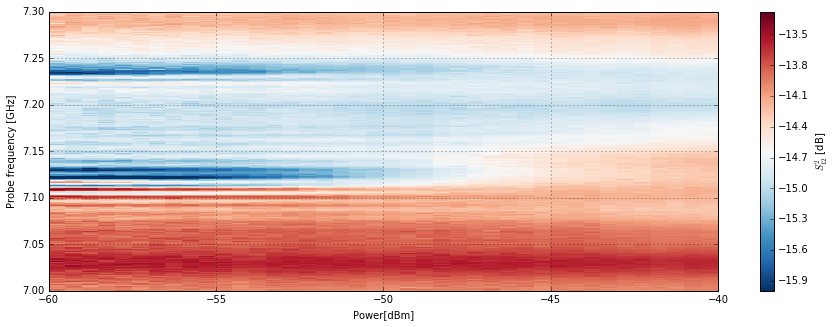

In [31]:
plt.pcolormesh(powers, freqs/1e9, 20*log10(abs(array(data))).T, cmap="RdBu_r", vmin=-16)
cb = plt.colorbar()
cb.set_label("$S_{12}^2$ [dB]")
plt.xlabel("Power[dBm]")
plt.ylabel("Probe frequency [GHz]")
plt.ylim(7, 7.3)
plt.gcf().set_size_inches(15,5)
plt.grid()

In [32]:
%matplotlib gtk

ModuleNotFoundError: No module named 'PyQt4'

C:\ProgramData\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  z = zeros(s,x.dtype.char)


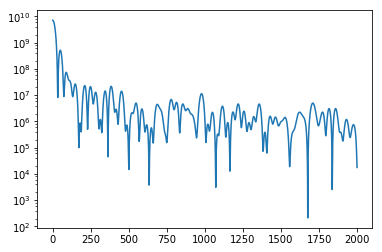

In [28]:
signal = 20*log10(vna.get_tracedata()[0])
plt.plot(abs(fft(signal, n=100e3)[:2000])**2)
plt.yscale("log")
# plt.xscale("log")

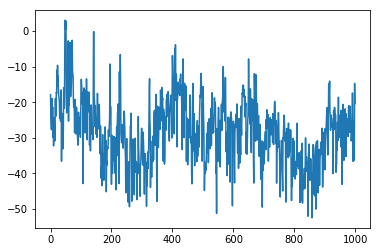

In [11]:
plt.plot(20*log10(vna.get_tracedata()[0]))